# Setup

In [ ]:
# Mount the drive (for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory to the desired folder
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters

/content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters


In [ ]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Read weekly customer complaints, with "week" as the datetime index
df = pd.read_csv("weekly_customer_complaints.csv", index_col="week", parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [ ]:
# Rename the "complaints" column to "y" for convenience
df = df.rename(columns={"complaints": "y"})
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [ ]:
# Get info about the DataFrame (column types, missing values, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   y                        261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


In [ ]:
# Remove commas from the "y" column and convert it to integer type
df["y"] = df["y"].str.replace(",", "").astype(int)
#df['y'].str.replace(',', '').astype(int)
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


# Data Visualization

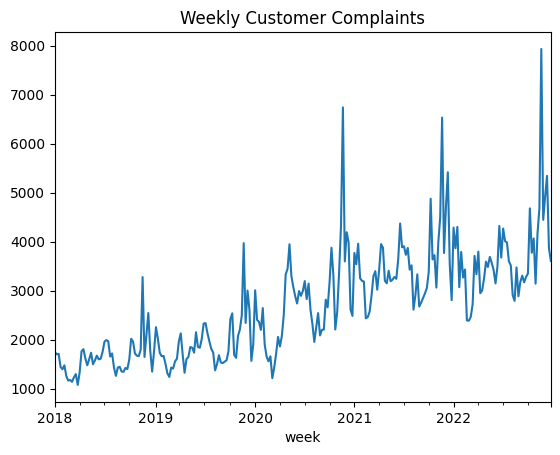

In [ ]:
# Basic time series plot of the weekly complaints
df["y"].plot(title="Weekly Customer Complaints")
plt.show()

# Seasonality

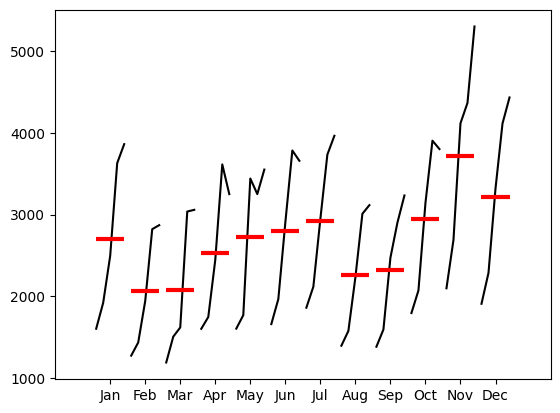

In [ ]:
# Resample the data monthly (month-end) and plot each month separately to observe patterns
month_plot(df['y'].resample('ME').mean())
plt.show()

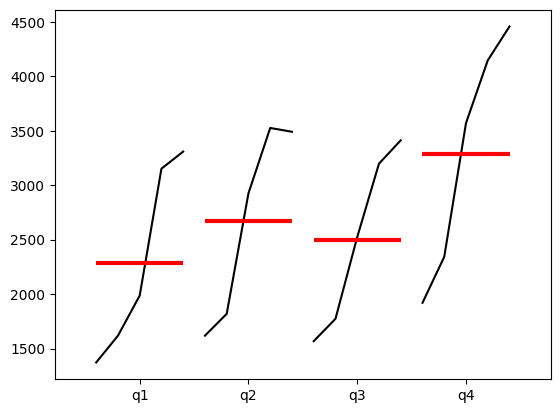

In [ ]:
# Resample quarterly (quarter-end) and plot to see the quarterly seasonality
quarter_plot(df['y'].resample('QE').mean())
plt.show()

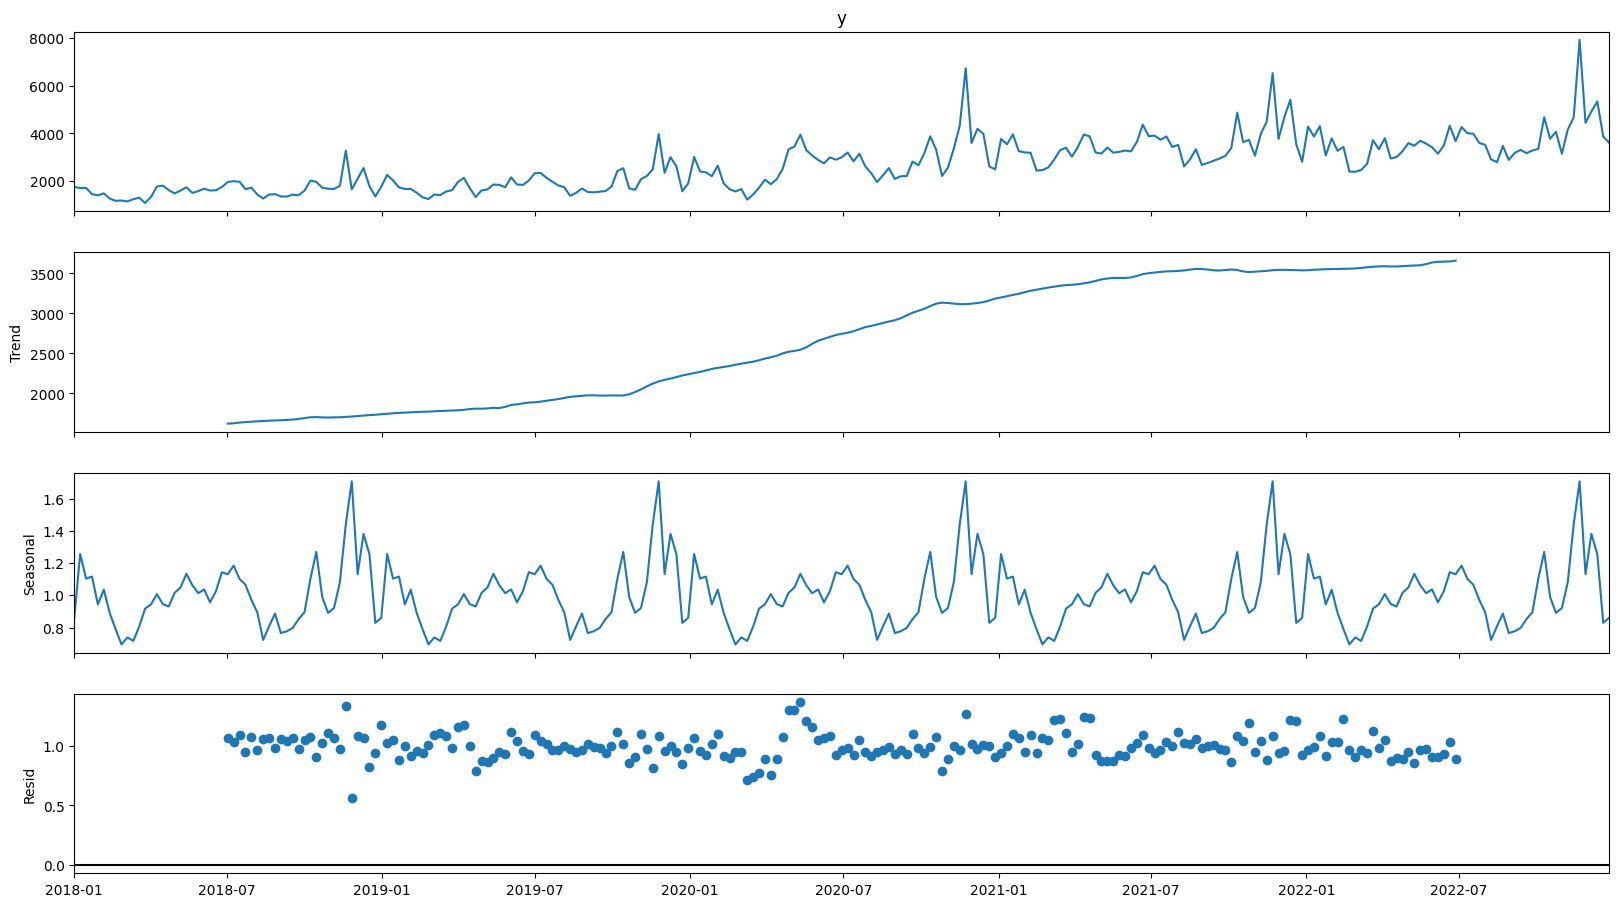

In [ ]:
# Decompose the time series into trend, seasonality, and residual.
# We assume a yearly period of 52 weeks for weekly data.
decomposition = seasonal_decompose(df['y'],
                                   model='multiplicative',
                                   period=52)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()

# 52 weeks per year

52 weeks per year

# (Partial) Auto-Correlation

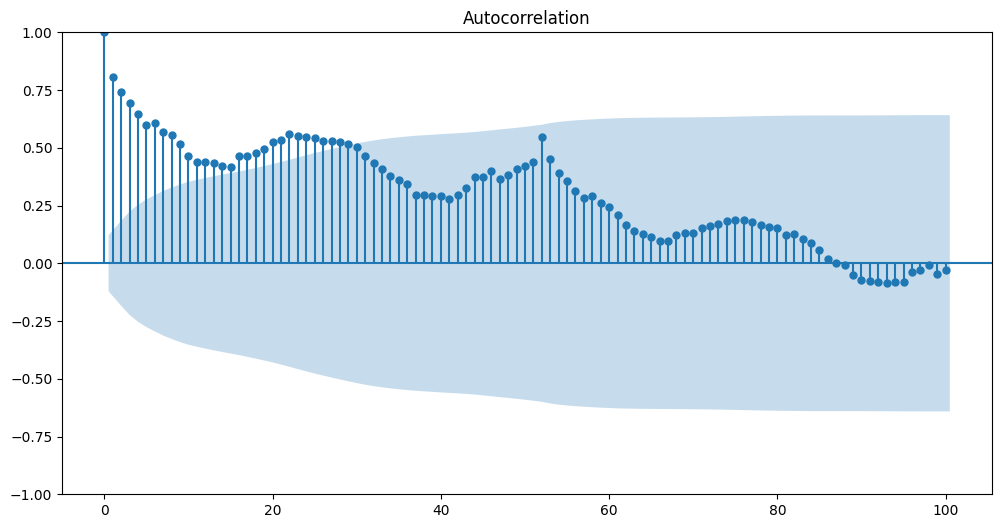

In [ ]:
# ACF plot to see correlation of the series with lagged values
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()

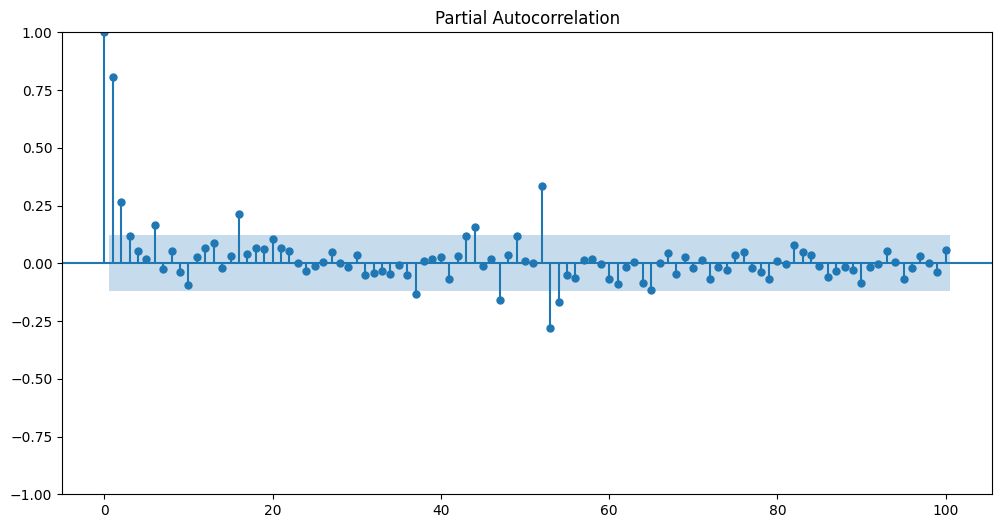

In [ ]:
# PACF plot to see partial correlation (effect after removing intermediate lags)
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['y'], lags=100, ax=ax)
plt.show()

# SETTING TIME SERIES FREQUENCY

In [ ]:
# Inspect the DateTimeIndex
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [ ]:
# Convert the DataFrame to have weekly frequency (Mon-based).
df = df.asfreq('W-MON')
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

# Training and Test

## GOAL: Predict the next 13 weeks

In [ ]:
# We want to forecast the next 13 weeks
periods = 13

# Splitting data into train (all but last 13 weeks) and test (last 13 weeks)
# train = df[:-periods].y
# test = df[-periods:].y

In [ ]:
# Other way to split data
train, test = df.iloc[:-periods, 0], df.iloc[-periods:, 0]

# Simple Exponential Smoothing

In [ ]:
# Fit a Simple Exponential Smoothing model on the training set
ses_model = SimpleExpSmoothing(train).fit()
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                      y   No. Observations:                  248
Model:             SimpleExpSmoothing   SSE                       74355648.448
Optimized:                       True   AIC                           3131.513
Trend:                           None   BIC                           3138.540
Seasonal:                        None   AICC                          3131.678
Seasonal Periods:                None   Date:                 Thu, 30 Jan 2025
Box-Cox:                        False   Time:                         13:05:16
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5115116                alpha                 True
initial_level              1750.0000                

The initial level gets updated. Therefore, the level used in our prediction is different than the initial level


In [ ]:
# Just a quick demonstration: check the last train value scaled (not used in final steps)
train.iloc[-1] * 0.51 + 1750

3422.29

In [ ]:
# Forecast the next 13 weeks using the fitted model
ses_pred = ses_model.forecast(periods)
ses_pred

,0
2022-10-03,3236.834414
2022-10-10,3236.834414
2022-10-17,3236.834414
2022-10-24,3236.834414
2022-10-31,3236.834414
2022-11-07,3236.834414
2022-11-14,3236.834414
2022-11-21,3236.834414
2022-11-28,3236.834414
2022-12-05,3236.834414


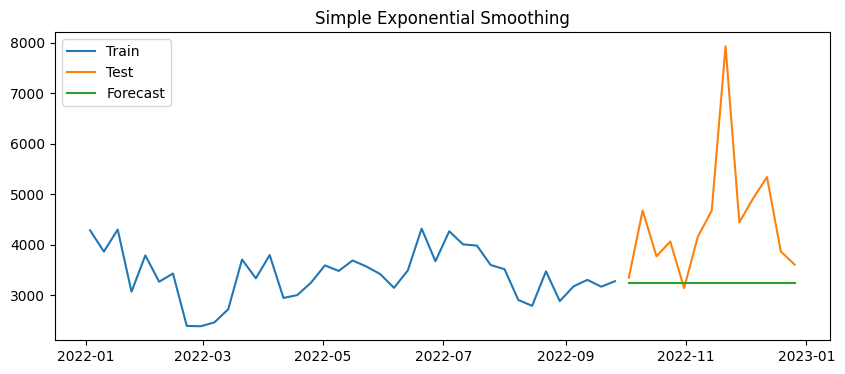

In [ ]:
# Set the size of the plot of 10 by 4
plt.figure(figsize = (10, 4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = "Train")
plt.plot(test, label = "Test")
plt.plot(ses_pred, label = "Forecast")

# Add a title and legend to the plot
plt.title("Simple Exponential Smoothing")
plt.legend()
plt.show()

# Double Exponential Smoothing

In [ ]:
# Build a double exponential smoothing model (trend="add" for additive trend)
model_double = ExponentialSmoothing(
    endog=train,
    trend="add",
    seasonal=None
).fit()
print(model_double.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       75700147.619
Optimized:                         True   AIC                           3139.958
Trend:                         Additive   BIC                           3154.011
Seasonal:                          None   AICC                          3140.306
Seasonal Periods:                  None   Date:                 Thu, 30 Jan 2025
Box-Cox:                          False   Time:                         13:12:22
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5212797                alpha                 True
smoothing_trend            0.01902

In [ ]:
# Forecast with the double ES model
double_pred = model_double.forecast(periods)
double_pred

,0
2022-10-03,3234.055865
2022-10-10,3232.618089
2022-10-17,3231.180312
2022-10-24,3229.742536
2022-10-31,3228.304760
2022-11-07,3226.866984
2022-11-14,3225.429208
2022-11-21,3223.991432
2022-11-28,3222.553655
2022-12-05,3221.115879


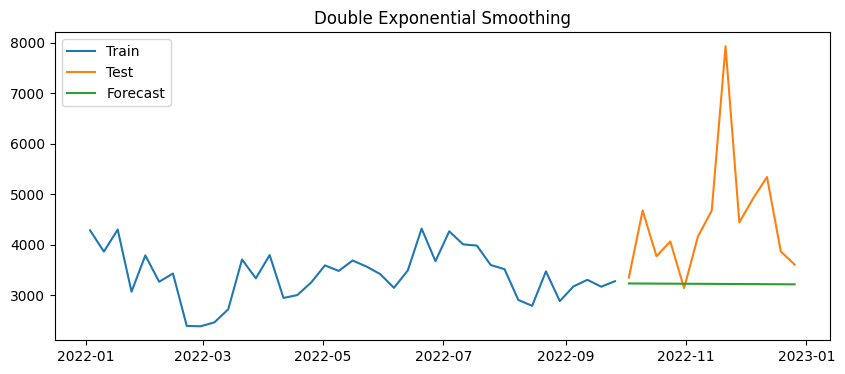

In [ ]:
# Plot the train, test and forecast
plt.figure(figsize = (10, 4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = "Train")
plt.plot(test, label = "Test")
plt.plot(double_pred, label = "Forecast")

# Add a title and legend to the plot
plt.title("Double Exponential Smoothing")
plt.legend()
plt.show()


# Holt Winter aka Tripe Exponential Smoothing

In [ ]:
# Build the Holt-Winters model with both trend and seasonality
# Using seasonal_periods=52 for weekly data, with a multiplicative season
model_holt = ExponentialSmoothing(
    endog=train,
    trend="add",
    seasonal="mul",
    seasonal_periods=52
).fit()
#print(model_holt.summary())

In [ ]:
# Forecast the next 13 weeks
holt_pred = model_holt.forecast(periods)
holt_pred[:5]

,0
2022-10-03,4025.154649
2022-10-10,5034.028978
2022-10-17,3914.089402
2022-10-24,3521.043538
2022-10-31,3417.610126


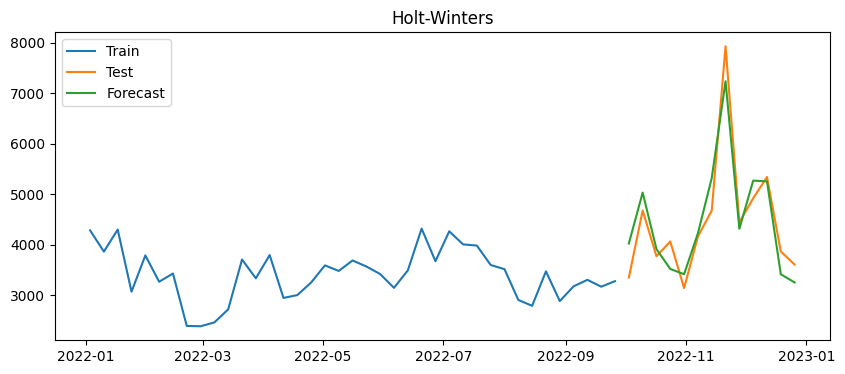

In [ ]:
# Plot the Train, Test and Forecast
plt.figure(figsize = (10, 4))

# Plot the train, test and forecast
plt.plot(train.loc['2022'], label = "Train")
plt.plot(test, label = "Test")
plt.plot(holt_pred, label = "Forecast")

# Add a title and legend to the plot
plt.title("Holt-Winters")
plt.legend()
plt.show()

In [ ]:
# Evaluate the forecast using RMSE, MAE, MAPE
rmse = root_mean_squared_error(test, holt_pred)
mae = mean_absolute_error(test, holt_pred)
mape = mean_absolute_percentage_error(test, holt_pred)
print(f"RMSE: {rmse:.0f}")
print(f"MAE: {mae:.0f}")
print(f"MAPE: {100 * mape:.1f} %")

RMSE: 425
MAE: 366
MAPE: 8.5 %


RMSE: 425
MAE: 366
MAPE: 8.5 %

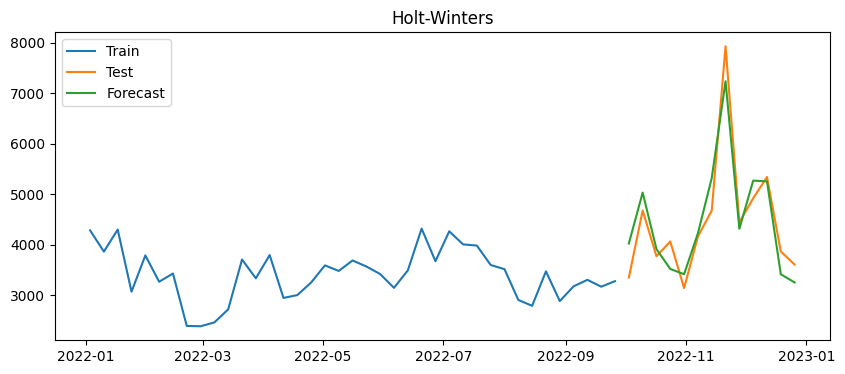

RMSE: 425
MAE: 366
MAPE: 8.5 %


In [ ]:
# Function that assesses the model and visualizes the train, test and forecast
def model_assessment(train, test, predictions, chart_title = None):
  """
  Visualize and evaluate forecasts using RMSE, MAE, MAPE metrics.
  """

  # Set the chart size
  plt.figure(figsize = (10, 4))

  # Plot the train, test and forecast
  plt.plot(train, label = "Train")
  plt.plot(test, label = "Test")
  plt.plot(predictions, label = "Forecast")
  plt.title(chart_title)
  plt.legend()
  plt.show()

  # Calculate and print the RMSE, MAE, and MAPE
  rmse = root_mean_squared_error(test, predictions)
  mae = mean_absolute_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)
  print(f"RMSE: {rmse:.0f}")
  print(f"MAE: {mae:.0f}")
  print(f"MAPE: {100 * mape:.1f} %")

model_assessment(train.loc['2022'], test, holt_pred, "Holt-Winters")

# Predict the future

In [ ]:
# Explore the data
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


In [ ]:
# Build a Holt-Winters model using the complete dataset
model_holt_complete = ExponentialSmoothing(
    endog=df.y,
    trend="add",
    seasonal="mul",
    seasonal_periods=52
).fit()

In [ ]:
# Forecast the next 13 weeks beyond the existing data
forecast = model_holt_complete.forecast(13)
forecast[:5]

,0
2023-01-02,4830.612817
2023-01-09,4343.461230
2023-01-16,4560.838965
2023-01-23,3690.825069
2023-01-30,4100.542668


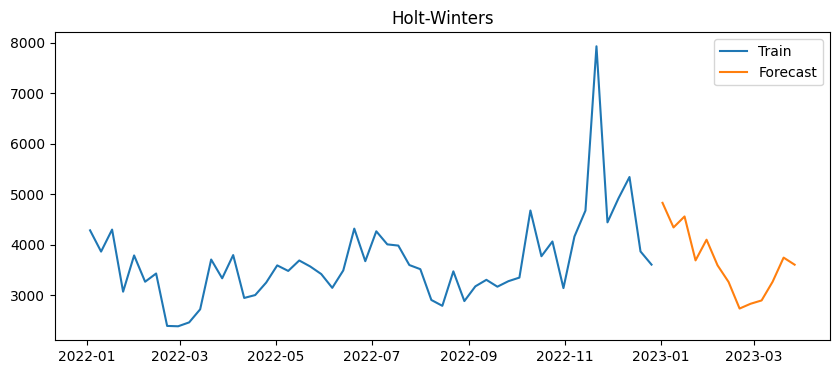

In [ ]:
def plot_future(y, forecast, chart_title = None):
  """
  Plots the historical data and future forecasts on the same axis.
  """

  # Plot the training data and forecast
  plt.figure(figsize = (10, 4))

  # Plot the train, test and forecast
  plt.plot(y, label = "Train")
  plt.plot(forecast, label = "Forecast")

  # Add a title and legend to the plot
  plt.title(chart_title)
  plt.legend()
  plt.show()

# Apply the function
plot_future(df.y.loc["2022"], forecast, "Holt-Winters")

# Daily Data

In [ ]:
# Load daily Bitcoin price data, focusing on 'Adj Close'
df_daily = pd.read_csv("bitcoin_price.csv", index_col="Date", parse_dates=True)['Adj Close'].rename("y")
df_daily.head()

,y
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Ensure the DataFrame has a daily frequency
df_daily = df_daily.asfreq('D')
df_daily.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq='D')

## Model Assessment

In [ ]:
# We'll reserve the last 30 days as test
periods = 30
train, test = df_daily.iloc[:-periods], df_daily.iloc[-periods:]

In [ ]:
# Build a Holt-Winters model with multiplicative trend & seasonality (weekly seasonality => 7 days)
model_daily = ExponentialSmoothing(
    endog=train,
    trend="mul",
    seasonal="mul",
    seasonal_periods=7
).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


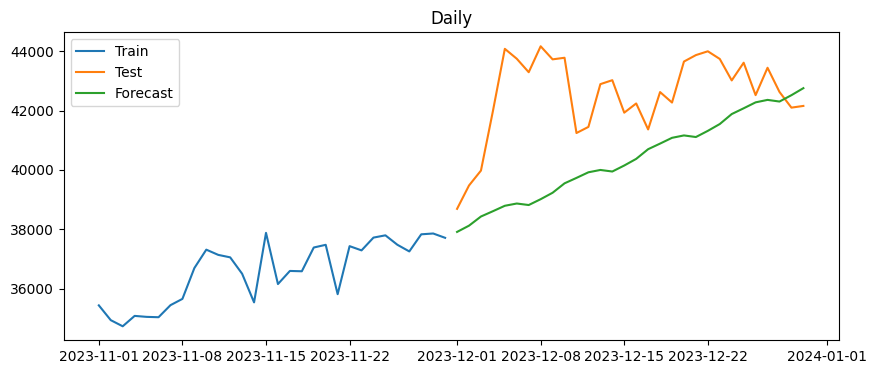

RMSE: 2695
MAE: 2243
MAPE: 5.2 %


In [ ]:
# Forecast the last 30 days
daily_pred = model_daily.forecast(periods)

# Assess the model using the previously defined function
model_assessment(train.loc["2023-11"], test, daily_pred, "Daily")